In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fig_style import *

import sys
sys.path.insert(0,'../')
from disk_model import DiskFitting, DiskImage

In [2]:
def get_central_flux(I, img, R0 = 20):
    N = img.shape[0]
    x = (np.arange(N)-N//2) * I.au_per_pix
    x,y = np.meshgrid(x,x)
    r = np.sqrt(x**2+y**2)
    F_center = np.sum(img*(r<R0))/np.sum(r<R0)
    return F_center

def get_sp_ind(D, is_model=True):
    Ia = D.disk_image_list[0]
    Iv = D.disk_image_list[1]
    if is_model:
        imga = Ia.img_model; imgv = Iv.img_model
    else:
        imga = Ia.img; imgv = Iv.img
    F1 = get_central_flux(Ia, imga)
    F2 = get_central_flux(Iv, imgv)
    nu1, nu2 = 1/0.087, 1/0.9 # arbitrary normalization
    sp_ind = np.log(F1/F2)/np.log(nu1/nu2)
    if (not is_model) and (F2<3*Iv.rms_Jy or F1<3*Ia.rms_Jy):
        return np.nan
    return sp_ind

In [3]:
with open('../data/fitted_systems/fit_1mm_Q1d5_age1e5.pkl','rb') as f:
    Ds = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1d5_age1e5_alma_only.pkl','rb') as f:
    Ds_alma = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1_age1e5.pkl','rb') as f:
    Ds_Q1 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q2_age1e5.pkl','rb') as f:
    Ds_Q2 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q10_age1e5.pkl','rb') as f:
    Ds_Q10 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q100_age1e5.pkl','rb') as f:
    Ds_Q100 = pickle.load(f)

In [4]:
# compute spectral index and only select systems
# with flux > 3 sigma at both wavelengths.
alpha_obs = np.array([get_sp_ind(D, False) for D in Ds])
alpha_fid = np.array([get_sp_ind(D) for D in Ds])
alpha_fid[np.isnan(alpha_obs)] = np.nan
alpha_alma = np.array([get_sp_ind(D) for D in Ds_alma])
alpha_alma[np.isnan(alpha_obs)] = np.nan
alpha_Q10 = np.array([get_sp_ind(D) for D in Ds_Q10])
alpha_Q10[np.isnan(alpha_obs)] = np.nan
alpha_Q100 = np.array([get_sp_ind(D) for D in Ds_Q100])
alpha_Q100[np.isnan(alpha_obs)] = np.nan

<ipython-input-2-4bf3b881651e>:19: RuntimeWarning: invalid value encountered in log
  sp_ind = np.log(F1/F2)/np.log(nu1/nu2)


In [5]:
get_sp_ind(Ds[1], True)

2.1652182127733264

In [6]:
def plot_hist(y, leave_tick_labels=False, **kwargs):
    bins = np.linspace(0, 5, 51)
    plt.hist(y, bins=bins, density=True, histtype='stepfilled', **kwargs)
    plt.xlim(1,4.8)
    set_ticks()
    if not leave_tick_labels:
        plt.gca().set_xticklabels([])
    plt.gca().set_yticks([])
    yl = plt.ylim()
    yl = (yl[0], yl[1]*1.25)
    plt.plot([2,2],yl,'k:', lw=.5)
    plt.plot([4.36,4.36],yl,'k:', lw=.5)
    plt.ylim(yl)

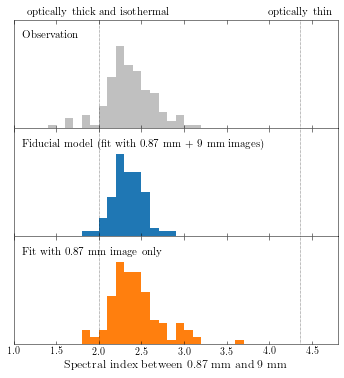

In [7]:
fig = plt.figure(figsize=(4.5,5))
ax = fig.add_axes([0,0.6,1,0.3])
plot_hist(alpha_obs, color='silver')
plt.text(1.1, plt.ylim()[1]*0.9, 'Observation', ha='left', va='top')
plt.text(2, plt.ylim()[1]*1.05, 'optically thick and isothermal', ha='center')
plt.text(4.36, plt.ylim()[1]*1.05, 'optically thin', ha='center')
ax = fig.add_axes([0,0.3,1,0.3])
plot_hist(alpha_fid, color='tab:blue')
plt.text(1.1, plt.ylim()[1]*0.9, 'Fiducial model (fit with 0.87 mm $+$ 9 mm images)', ha='left', va='top')
ax = fig.add_axes([0,0.0,1,0.3])
plot_hist(alpha_alma, leave_tick_labels=True, color='tab:orange')
plt.text(1.1, plt.ylim()[1]*0.9, 'Fit with 0.87 mm image only', ha='left', va='top')
plt.xlabel('Spectral index between 0.87 mm and 9 mm')
plt.savefig('../figures/spectral_index.pdf',bbox_inches='tight')

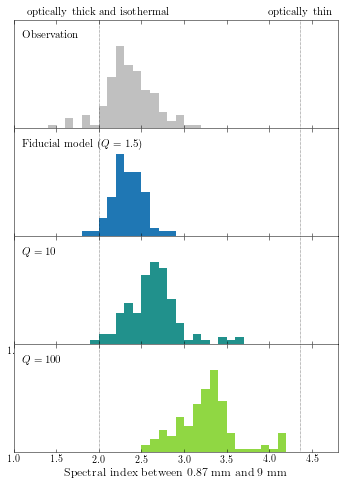

In [8]:
fig = plt.figure(figsize=(4.5,5*4/3))
h = 0.3*3/4

N = 3
import matplotlib
colors = matplotlib.cm.get_cmap('viridis')((np.arange(N)+0.5)/N)

ax = fig.add_axes([0,h*3,1,h])
plot_hist(alpha_obs, color='silver')
plt.text(1.1, plt.ylim()[1]*0.9, 'Observation', ha='left', va='top')
plt.text(2, plt.ylim()[1]*1.05, 'optically thick and isothermal', ha='center')
plt.text(4.36, plt.ylim()[1]*1.05, 'optically thin', ha='center')

ax = fig.add_axes([0,h*2,1,h])
plot_hist(alpha_fid, color='tab:blue')#colors[0])
plt.text(1.1, plt.ylim()[1]*0.9, 'Fiducial model ($Q=1.5$)', ha='left', va='top')

ax = fig.add_axes([0,h,1,h])
plot_hist(alpha_Q10, leave_tick_labels=True, color=colors[1])
plt.text(1.1, plt.ylim()[1]*0.9, '$Q=10$', ha='left', va='top')

ax = fig.add_axes([0,0,1,h])
plot_hist(alpha_Q100, leave_tick_labels=True, color=colors[2])
plt.text(1.1, plt.ylim()[1]*0.9, '$Q=100$', ha='left', va='top')

plt.xlabel('Spectral index between 0.87 mm and 9 mm')
plt.savefig('../figures/spectral_index_Q.pdf',bbox_inches='tight')